<a href="https://colab.research.google.com/github/KodaliSuchitraKamala/Wipro_Training/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted Class :  0


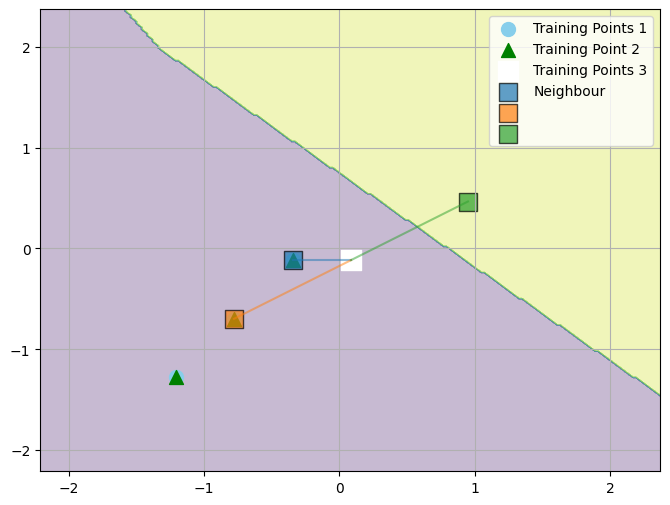

In [1]:
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
x=np.array([[1,2],[2,3],[3,4],[6,5],[7,7]])
y=np.array([0,0,0,1,1])
new_point=np.array([[4,4]])
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)
scalednewpoint=scaler.transform(new_point)
k=3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_scale,y)
prediction=knn.predict(scalednewpoint)
print('Predicted Class : ',prediction[0])
h=0.02
x_min,x_max=x_scale[:,0].min()-1,x_scale[:,0].max()+1
y_min,y_max=x_scale[:,0].min()-1,x_scale[:,0].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
z=knn.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx,yy,z,alpha=0.3)
plt.scatter(x_scale[y==0,0],x_scale[y==0,1],c='skyblue',marker='o',s=100,label="Training Points 1")
plt.scatter(x_scale[y==0,0],x_scale[y==0,1],c='green',marker="^",s=100,label='Training Point 2')
plt.scatter(scalednewpoint[:,0],scalednewpoint[:,1],c='white',marker='s',s=200,label="Training Points 3")
distance,indices=knn.kneighbors(scalednewpoint)
for idx in indices[0]:
    plt.plot([scalednewpoint[0,0],x_scale[idx,0]],[scalednewpoint[0,1],x_scale[idx,1]],alpha=0.5)
    plt.scatter(x_scale[idx,0],x_scale[idx,1],s=150,marker='s',edgecolors='k',alpha=0.7,label='Neighbour' if idx==indices[0][0] else ' ')
plt.legend()
plt.grid()
plt.show()

### Cluster - k means. find k  number of cenmtroids.
 1.kmeans

 2.data parameters(number of clusters k)

 3.model

 4.fit

 5.cluster analyze

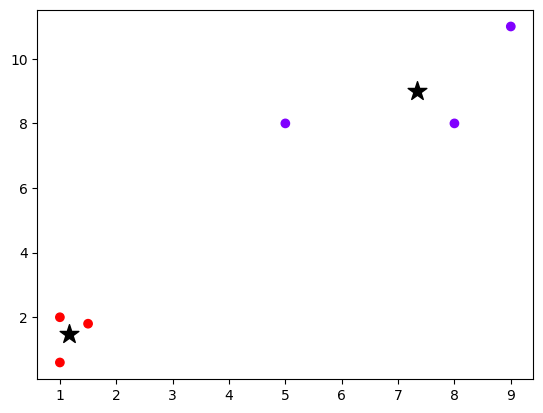

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
x = np.array([
    [1, 2], [1.5, 1.8], [5, 8],
    [8, 8], [1, 0.6], [9, 11]
])
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(x)
plt.scatter(x[:, 0], x[:, 1], c = kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', marker = '*')
plt.show()

silhoutte score: 0.596

 Cluster Summary:     cluster_id  n_points  fraction  centroid_x  centroid_y  centroid_z
0           0       350       0.0      -6.034       6.577      -6.046
1           1       450       0.0      -0.015       0.044       0.001
2           2       201       0.0       5.745       5.860       5.148
3           3       199       0.0       7.226       7.337       5.786


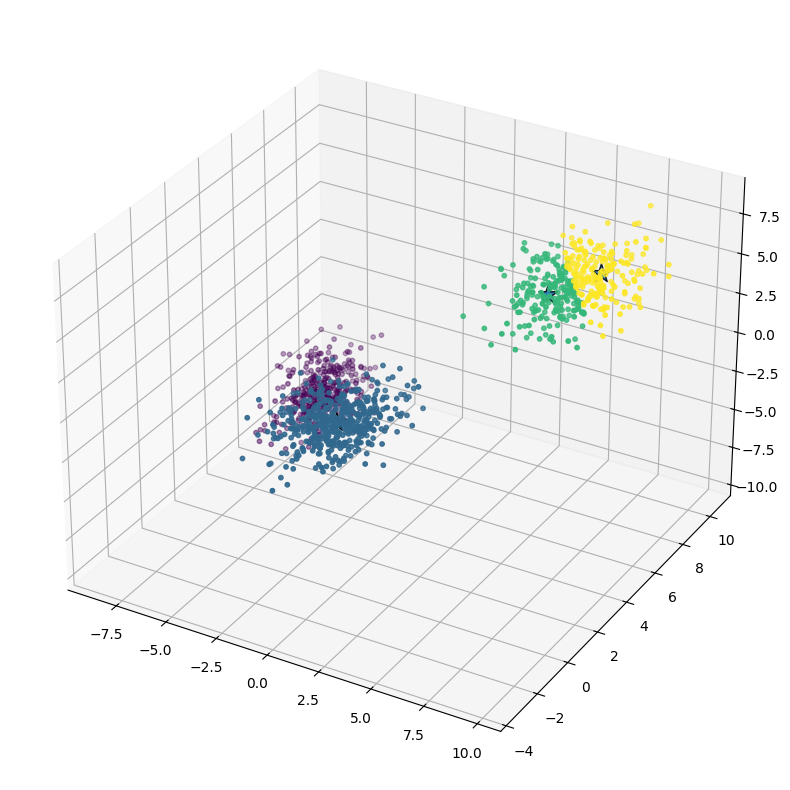

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
rng = np.random.default_rng(42)
n_per_cluster = [450, 400, 350, 300]
means = np.array([[0, 0, 0], [6.5, 6.5, 5.5],
                  [-6, 6.5, -6]])
covs = [
    np.array([[1.2, 0.2, 0.0],
              [0.2, 1.0, 0.1],
              [0.0, 0.1, 0.8]]),
    np.array([[1.5, 0.3, 0.1],
              [0.3, 1.8, 0.2],
              [0.1, 0.2, 1.0]]),
    np.array([[0.9, -0.2, 0.],
              [-0.2, 1.3, 0.1],
              [0.0, 0.1, 1.1]]),
    np.array([[1.1, 0.0, -0.1],
              [0.0, 1.0, 0.0],
              [-0.1, 0.0, 1.4]])
]
clusters = [rng.multivariate_normal(m, c, size = n) for n, m, c in zip(n_per_cluster, means, covs)]
x = np.vstack(clusters)
x = x[rng.permutation(len(x))]
k = 4
kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
labels = kmeans.fit_predict(x)
sil = silhouette_score(x, labels)
print(f"silhoutte score: {sil:.3f}")
sizes = pd.Series(labels).value_counts().sort_index()
summary_df = pd.DataFrame({'cluster_id': sizes.index, 'n_points': sizes.values})
summary_df['fraction'] = (summary_df['n_points'] / len(x)).round()
summary_df['centroid_x'] = np.round(kmeans.cluster_centers_[:, 0], 3)
summary_df['centroid_y'] = np.round(kmeans.cluster_centers_[:, 1], 3)
summary_df['centroid_z'] = np.round(kmeans.cluster_centers_[:, 2], 3)
print("\n Cluster Summary: ", summary_df)
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c = labels, s = 10)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker = '*', s = 200, edgecolor = 'black')
plt.tight_layout()
plt.show()